In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import binarize

#Simmons DATA 

In [2]:
data = pd.read_excel('G:/IIT - nptel/Data Analytics with Python/data/Simmons.xlsx')
data

,Customer,Spending,Card,Coupon
0,1,2.291,1,0
1,2,3.215,1,0
2,3,2.135,1,0
3,4,3.924,0,0
4,5,2.528,1,0
...,...,...,...,...
95,96,3.318,0,0
96,97,2.421,1,0
97,98,6.073,0,0
98,99,2.630,1,0


In [3]:
data.describe()

,Customer,Spending,Card,Coupon
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,3.333790,0.500000,0.400000
std,29.011492,1.741298,0.502519,0.492366
min,1.000000,1.058000,0.000000,0.000000
25%,25.750000,2.059000,0.000000,0.000000
50%,50.500000,2.805500,0.500000,0.000000
75%,75.250000,4.468250,1.000000,1.000000
max,100.000000,7.076000,1.000000,1.000000


In [4]:
data['Coupon'].unique()  # It gives unique value in particular column

array([0, 1], dtype=int64)

In [5]:
data['Coupon'].value_counts()

0    60
1    40
Name: Coupon, dtype: int64

In [6]:
x = data[['Card', 'Spending']]
y = data['Coupon'].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [7]:
len(x_train), len(y_train), len(x_test), len(y_test)

(75, 75, 25, 25)

In [8]:
Lreg = LogisticRegression(solver = 'lbfgs')
Lreg.fit(x_train, y_train.ravel()) # ravel( will return 1D array with all the input-array elements )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
y_predict = Lreg.predict(x_test)
y_predict

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0], dtype=int64)

In [10]:
y_predict_train = Lreg.predict(x_train)
y_predict_train

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [11]:
y_prob_train = Lreg.predict_proba(x_train)[:, 1]
y_prob_train.reshape(1, -1)

array([[0.49622117, 0.32880793, 0.44329114, 0.33320924, 0.41456465,
        0.32890329, 0.3975043 , 0.66921229, 0.25844531, 0.63672372,
        0.29274386, 0.28466974, 0.5159296 , 0.41992276, 0.24342356,
        0.528514  , 0.47965107, 0.52805789, 0.33191449, 0.27457435,
        0.49179296, 0.63261616, 0.24690181, 0.47089452, 0.27842076,
        0.41663875, 0.36155602, 0.49970327, 0.23621636, 0.37860052,
        0.48809323, 0.28877877, 0.28563859, 0.37231882, 0.65309742,
        0.43807264, 0.33638478, 0.40406607, 0.23431177, 0.37282384,
        0.49970327, 0.39768396, 0.32880793, 0.25782472, 0.47393834,
        0.42878861, 0.26520939, 0.33320924, 0.54682499, 0.45446086,
        0.44326597, 0.4965167 , 0.60065954, 0.38989654, 0.49149447,
        0.27414424, 0.27785686, 0.67464141, 0.28195004, 0.48593427,
        0.38633222, 0.31373499, 0.42810085, 0.27418723, 0.44371771,
        0.41629601, 0.642004  , 0.6571001 , 0.44068025, 0.28195004,
        0.40217015, 0.43807264, 0.50977653, 0.57

In [12]:
y_prob = Lreg.predict_proba(x_test)[:, 1]
y_prob.reshape(1, -1)
y_prob

array([0.52802946, 0.49516653, 0.45703306, 0.27712052, 0.34390047,
       0.26825171, 0.27712052, 0.607686  , 0.42836534, 0.43637155,
       0.31387455, 0.23676248, 0.45703306, 0.43602768, 0.37596116,
       0.44900317, 0.46952365, 0.68521935, 0.25167254, 0.47073304,
       0.42361093, 0.56580644, 0.52792177, 0.40302605, 0.27457435])

In [13]:
x = data[['Spending', 'Card']]
y = data['Coupon']

In [14]:
x1 = sm.add_constant(x)
logit_model = sm.Logit(y, x1)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.604869
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Coupon   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Sun, 29 Mar 2020   Pseudo R-squ.:                  0.1012
Time:                        15:20:13   Log-Likelihood:                -60.487
converged:                       True   LL-Null:                       -67.301
Covariance Type:            nonrobust   LLR p-value:                  0.001098
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1464      0.577     -3.718      0.000      -3.278      -1.015
Spending       0.3416      0.

C:\Users\suvar\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [15]:
score = accuracy_score(y_test, y_predict)
score

0.76

In [16]:
confusion_matrix(y_test, y_predict)

array([[15,  1],
       [ 5,  4]], dtype=int64)

In [17]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
print("True Negatives: ", tn)
print("False Positives: ", fp)
print("False Negatives: ", fn)
print("True Positives: ", tp)

True Negatives:  15
False Positives:  1
False Negatives:  5
True Positives:  4


In [18]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.80      0.44      0.57         9

    accuracy                           0.76        25
   macro avg       0.78      0.69      0.70        25
weighted avg       0.77      0.76      0.74        25



In [21]:
Specificity = tn/ (tn + fp)
print("Specificity {:0.2f}".format(Specificity))

Specificity 0.94


In [22]:
Sensitivity = tp/ (tp + fn)
print("Sensitivity {:0.2f}".format(Sensitivity))

Sensitivity 0.44


### ROC Curve for Training Dataset

In [25]:
log_ROC_AUC = roc_auc_score(y_train, y_predict_train)
fpr1, tpr1, thresholds1 = roc_curve(y_train, y_prob_train)
roc_auc1 = auc(fpr1, tpr1)

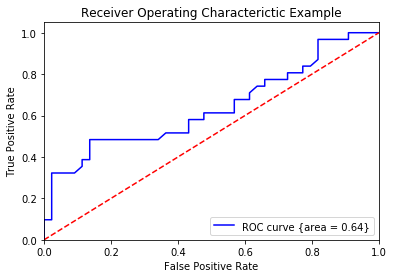

In [28]:
plt.figure()
plt.plot(fpr1, tpr1, color = "blue", label = "ROC curve {area = %0.2f}" % roc_auc1)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characterictic Example")
plt.legend(loc = "lower right")
plt.show()

### ROC Curve for Test Dataset

In [29]:
log_ROC_AUC = roc_auc_score(y_test, y_predict)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_prob)
roc_auc2 = auc(fpr2, tpr2)

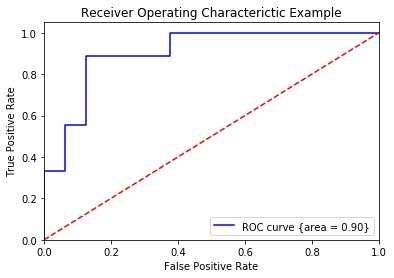

In [30]:
plt.figure()
plt.plot(fpr2, tpr2, color = "blue", label = "ROC curve {area = %0.2f}" % roc_auc2)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characterictic Example")
plt.legend(loc = "lower right")
plt.show()

 ### Accuracy Checkingg fro Differeny Threshold Values

In [32]:
# Threshold Value = 0.35
y_predict_class1 = binarize(y_prob.reshape(1, -1), 0.35)[0]
y_predict_class1

array([1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0.])

In [33]:
#Converting the array from float data type to integer data type
y_predict_class1 = y_predict_class1.astype(int)
y_predict_class1

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0])

In [34]:
confusion_matrix_2 = confusion_matrix(y_test, y_predict_class1)
print(confusion_matrix_2)

[[8 8]
 [0 9]]


In [35]:
# Threshold Value = 0.5
y_predict_class2 = binarize(y_prob.reshape(1, -1), 0.5)[0]
y_predict_class2

array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0.])

In [36]:
confusion_matrix_3 = confusion_matrix(y_test, y_predict_class2)
print(confusion_matrix_3)

[[15  1]
 [ 5  4]]


In [37]:
print(classification_report(y_test, y_predict_class2))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.80      0.44      0.57         9

    accuracy                           0.76        25
   macro avg       0.78      0.69      0.70        25
weighted avg       0.77      0.76      0.74        25



In [39]:
# Threshold Value = 0.70

y_predict_class3 = binarize(y_prob.reshape(1, -1), 0.70)[0]

y_predict_class3

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [40]:
confusion_matrix_4 = confusion_matrix(y_test, y_predict_class3)
print(confusion_matrix_4)

[[16  0]
 [ 9  0]]


In [41]:
print(classification_report(y_test, y_predict_class3))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78        16
           1       0.00      0.00      0.00         9

    accuracy                           0.64        25
   macro avg       0.32      0.50      0.39        25
weighted avg       0.41      0.64      0.50        25



C:\Users\suvar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Calculating the Optimal Threshold Value

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

In [43]:
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.902778


In [48]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index = i), 'tpr' : pd.Series(tpr, index = i),
                    '1 - fpr' : pd.Series(1- fpr, index = i), 'tf' : pd.Series(tpr - (1 - fpr), index = i),
                    'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1 - fpr,tf,thresholds
7,0.125,0.888889,0.875,0.013889,0.457033


### Optimal Threshold Value in ROC Curve

[]

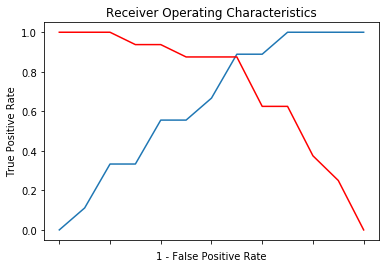

In [50]:
fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1 - fpr'], color = 'red')
plt.xlabel('1 - False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
ax.set_xticklabels([])

Classification Report using Optimal Threshold Value

In [51]:
# Threshold Value = 0.45

y_predict_class4 = binarize(y_prob.reshape(1, -1), 0.45)[0]

y_predict_class4

array([1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 0.])

In [52]:
confusion_matrix_5 = confusion_matrix(y_test, y_predict_class4)
print(confusion_matrix_5)

[[14  2]
 [ 1  8]]


In [53]:
print(classification_report(y_test, y_predict_class4))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.80      0.89      0.84         9

    accuracy                           0.88        25
   macro avg       0.87      0.88      0.87        25
weighted avg       0.89      0.88      0.88        25

